# 1a. Machine Learning Approach
Since we aim to group data based on similarity, clustering is the appropriate machine learning approach. Clustering allows grouping data points without any labels, which fits well with this unsupervised learning problem.

# 1b. Implement Three Different Models
- K-Means Clustering: This algorithm minimizes the variance within clusters by assigning data points to the nearest cluster center.
- Hierarchical Clustering: It builds a hierarchy of clusters and can be helpful if you want a dendrogram for further insights.
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN groups together closely packed points and can help in identifying outliers.

# 1c. Modify Visualization Code

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./Global_Education_Dataset_UAS.csv')
df.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,very high,extremely low,moderately low
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,very high,moderately low,moderate
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,very high,moderately low,moderately low
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,very high,extremely low,extremely low
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,very high,extremely low,low


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

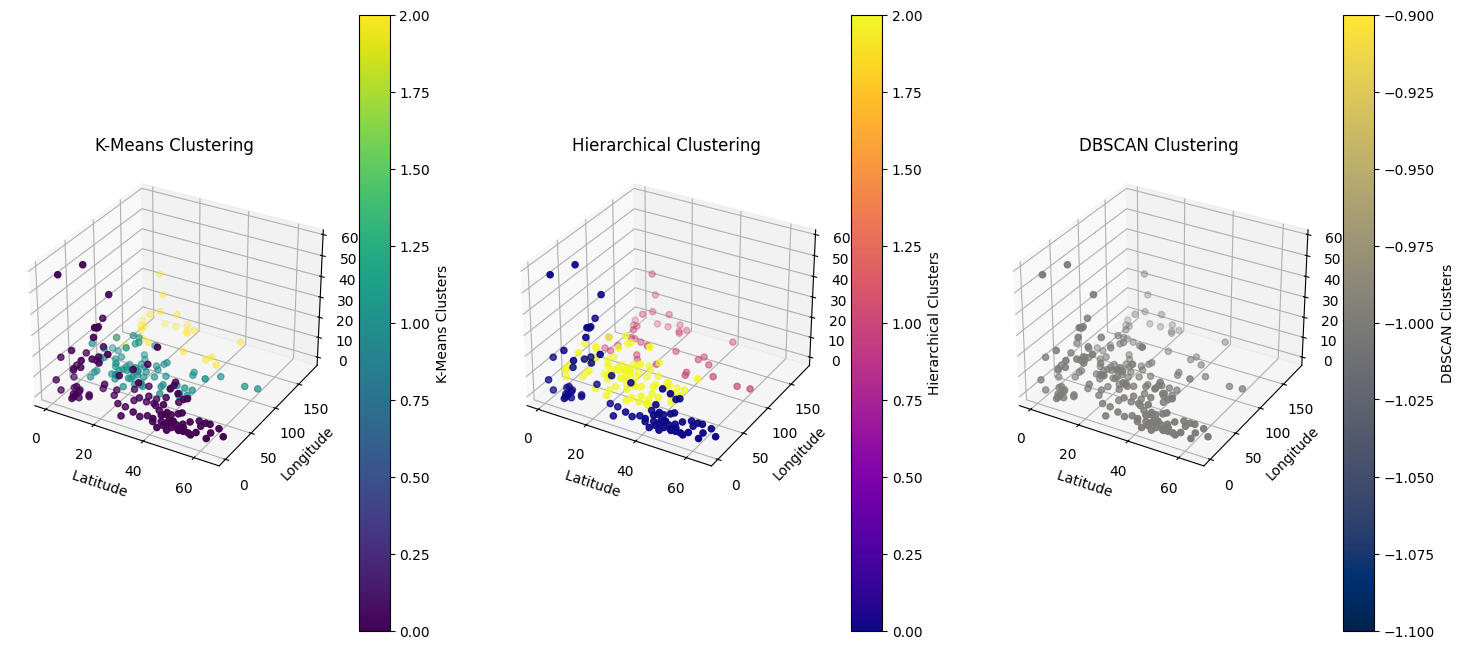

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Define the features for visualization
feat1, feat2, feat3 = 'Latitude ', 'Longitude', 'OOSR_Primary_Age_Male'

kmeans = KMeans(n_clusters=3)
df['k_means'] = kmeans.fit_predict(df[[feat1, feat2, feat3]])

hierarchical = AgglomerativeClustering(n_clusters=3)
df['hierarchical'] = hierarchical.fit_predict(df[[feat1, feat2, feat3]])

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan'] = dbscan.fit_predict(df[[feat1, feat2, feat3]])

# Create a 3D plot
fig = plt.figure(figsize=(18, 8))

# Plot for K-Means
ax1 = fig.add_subplot(131, projection='3d')
scatter_kmeans = ax1.scatter(df[feat1], df[feat2], df[feat3], c=df['k_means'], cmap='viridis')
color_bar1 = fig.colorbar(scatter_kmeans, ax=ax1)
color_bar1.set_label('K-Means Clusters')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel(feat1)
ax1.set_ylabel(feat2)
ax1.set_zlabel(feat3)

# Plot for Hierarchical Clustering
ax2 = fig.add_subplot(132, projection='3d')
scatter_hierarchical = ax2.scatter(df[feat1], df[feat2], df[feat3], c=df['hierarchical'], cmap='plasma')
color_bar2 = fig.colorbar(scatter_hierarchical, ax=ax2)
color_bar2.set_label('Hierarchical Clusters')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel(feat1)
ax2.set_ylabel(feat2)
ax2.set_zlabel(feat3)

# Plot for DBSCAN
ax3 = fig.add_subplot(133, projection='3d')
scatter_dbscan = ax3.scatter(df[feat1], df[feat2], df[feat3], c=df['dbscan'], cmap='cividis')
color_bar3 = fig.colorbar(scatter_dbscan, ax=ax3)
color_bar3.set_label('DBSCAN Clusters')
ax3.set_title('DBSCAN Clustering')
ax3.set_xlabel(feat1)
ax3.set_ylabel(feat2)
ax3.set_zlabel(feat3)

# Show the plots
plt.show()

# 1d. Analysis of Results
- K-Means Clustering:
The K-Means plot shows distinct clusters with clear separation. Each point is assigned to one of three clusters (indicated by the colors in the color bar). K-Means tends to create spherical clusters, so it effectively groups regions based on educational data where the data points are more uniform in density. This method performs well with data that has clear cluster centers but may struggle with complex shapes or noise.
- Hierarchical Clustering:
Hierarchical clustering shows a different set of clusters, with points being grouped in a hierarchical manner. This can provide insights into relationships between clusters. The colors reveal that the clusters might overlap slightly more than in K-Means, indicating that Hierarchical clustering is capturing different structure within the data. Hierarchical clustering can handle complex relationships but is more sensitive to noise, making it slightly less suitable if the dataset contains many outliers.
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN appears to identify the majority of points as a single cluster, with only a few points classified as noise (seen in darker gray tones). DBSCAN is effective for identifying outliers or noise in datasets, which could be useful for spotting regions with atypical educational data. However, if the data doesn’t have a clear density separation between clusters, DBSCAN may classify most points in a single cluster or treat points as noise, as seen here.

In summary, K-Means seems to provide the clearest separation of clusters for this dataset, while DBSCAN is best if identifying outliers is a priority. Hierarchical Clustering provides a middle ground, offering insights into group relationships with slight sensitivity to noise.

# 